### Домашнее задание 3
<ol>
<li>Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston.
<ul>
<li>Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
<li>Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).
</ul>
    <li>(*) Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?


In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import os.path
import itertools
import warnings
import time
from pprint import pprint
import seaborn as sns

from tensorflow import keras as keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

import warnings

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from keras.datasets import boston_housing

from sklearn.metrics import r2_score

%matplotlib inline
warnings.filterwarnings('ignore')

#### Загружаем данные

In [2]:


(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train.shape, y_train.shape, X_test.shape

((404, 13), (404,), (102, 13))

In [3]:
# 1.2. Features types and NANs
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

display(X_train_df.info())
display(X_test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       102 non-null    float64
 1   1       102 non-null    float64
 2   2       102 non-null    float64
 3   3       102 non-null    float64
 4   4       102 non-null    float64
 5   5       102 non-null    float64
 6   6       102 non-null    float64
 7   7       102 non-null    float64
 8   8       102 non-null    float64
 9   9       102 non-null    float64
 10  10      102 non-null    float64
 11  11      102 non-null    float64
 12  12      102 non-null    float64
dtypes: float64(13)
memory usage: 10.5 KB


None

In [4]:
display(X_train_df.describe())
display(X_test_df.describe())

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.00000
mean,3.092336,10.901961,11.264902,0.098039,0.544156,6.354157,66.849020,4.011982,9.980392,417.500000,18.374510,364.163333,12.30549
std,5.373088,21.572929,7.084148,0.298836,0.110015,0.672335,29.034993,2.379973,8.772121,177.390477,2.026785,79.138325,6.69540
min,0.013110,0.000000,1.220000,0.000000,0.392000,4.880000,6.000000,1.465500,1.000000,187.000000,13.000000,24.650000,1.92000
25%,0.084840,0.000000,5.455000,0.000000,0.445500,5.966000,42.450000,2.117375,4.000000,279.250000,17.400000,377.692500,7.30500
50%,0.229015,0.000000,9.795000,0.000000,0.532000,6.229000,73.750000,3.324850,5.000000,330.000000,18.900000,392.110000,11.06000
75%,3.779445,16.250000,18.100000,0.000000,0.609000,6.633750,92.975000,5.276650,24.000000,666.000000,20.200000,396.780000,15.91500
max,25.046100,90.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,31.99000


Пропусков нет, однако 3-й признак похож на бинарный, 8 - на категориальный

In [5]:
# Проверка категориальности признаков
print('feature 3')
display(X_train_df[3].value_counts())
display(X_test_df[3].value_counts())
print(30*'-')
print('feature 8')
display(X_train_df[8].value_counts())
display(X_test_df[8].value_counts())

feature 3


0.0    379
1.0     25
Name: 3, dtype: int64

0.0    92
1.0    10
Name: 3, dtype: int64

------------------------------
feature 8


24.0    104
5.0      92
4.0      89
3.0      31
2.0      21
6.0      20
8.0      20
1.0      17
7.0      10
Name: 8, dtype: int64

24.0    28
5.0     23
4.0     21
3.0      7
7.0      7
6.0      6
8.0      4
2.0      3
1.0      3
Name: 8, dtype: int64

In [6]:
# Преобразование признаков

X_train_df[[3,8]] = X_train_df[[3,8]].astype('category')
X_test_df[[3,8]] = X_test_df[[3,8]].astype('category')

X_train_df = pd.get_dummies(X_train_df, drop_first=True)
X_test_df = pd.get_dummies(X_test_df, drop_first=True)

print(set(X_train_df.columns.tolist()) - set(X_test_df.columns.tolist())) # check

set()


{'4-2': 0.7741996063949135,
 '2-4': 0.7741996063949135,
 '7-4': -0.7770621279671122,
 '7-6': -0.7666699665648697,
 '4-7': -0.7770621279671122,
 '6-7': -0.7666699665648697,
 '8_24.0-9': 0.9216163253452926,
 '9-8_24.0': 0.9216163253452926}

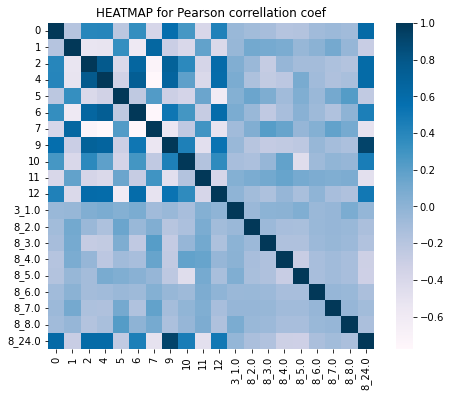

In [7]:
# 1.5. Corellation check

def plot_corr_map(corr_matrix):
    "plot given correlation matrix in heatmap style"
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes()
    ax.set_title('HEATMAP for Pearson correllation coef')
    sns.heatmap(corr_matrix, square=True,ax=ax,cmap='PuBu');

# 2.4.2. Корелляция непрерывных данных
#corr_matrix = X_train_df.corr()
#plot_corr_map(corr_matrix)

# 3.5.3. Корелляция всех признаков
corr_matrix = X_train_df.corr()
plot_corr_map(corr_matrix)

correlated_features = dict()
corr_threshold = 0.75

for col in corr_matrix.columns:
    for row in corr_matrix[col].index:
        if corr_threshold < abs(corr_matrix.loc[row, col]) < 1.0:
            pair = f'{row}-{col}'
            correlated_features[pair] = corr_matrix.loc[row, col]

display(correlated_features)

Существует 4 пары признаков, корелляционно связанных. Однако вследствие того, что для обучения будет использоваться в общем случае нелинейная модель (ИНС), а также за счет регуляризации (Dropout) - удаляться данные признаки здесь не будут.  
Далее будет проверены главные компоненты и кластерный анализ

In [8]:
# маштабирование
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_df)
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X_train_df.columns)

X_test_scaled = scaler.transform(X_test_df)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns=X_test_df.columns)

In [9]:
# воспользуемся методом главных компонент
from sklearn.decomposition import PCA
break_even = [0.8, 0.9, 0.95, 0.975, 0.99]

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
var_vector = np.cumsum(pca.explained_variance_ratio_)

for level in break_even:
    temp_list = []
    for n in var_vector:
        if n<=level: temp_list.append(n)
    print(f'required number of components for {level*100}% of total VAR is {len(temp_list)}')  

required number of components for 80.0% of total VAR is 6
required number of components for 90.0% of total VAR is 9
required number of components for 95.0% of total VAR is 12
required number of components for 97.5% of total VAR is 14
required number of components for 99.0% of total VAR is 17


Исходя из выводов РСА - удаление 3 признаков сохраняет 99% вариации, что соответствует выводам корелляции. 
Вследствие того, что в целом пространство признаков небольшое, преобразование далее осуществляться не будет

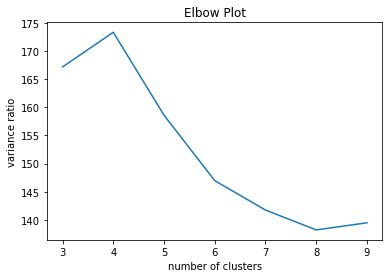

Silhouette Score for 3 clusters is 0.42496


In [10]:
# проверим KNN

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

n_cluster_list, calinski_metric_list = [], []

for n_cluster in range(3,10):
    n_cluster_list.append(n_cluster)
    k_means = KMeans(n_clusters=n_cluster, random_state=37, init='k-means++')
    k_means.fit(X_train_scaled)
    calinski_metric_list.append(calinski_harabasz_score(X_train_scaled, k_means.labels_))
    
plt.plot(n_cluster_list, calinski_metric_list)
plt.xlabel('number of clusters')
plt.ylabel('variance ratio')
plt.title('Elbow Plot')
plt.show()

k_means_optimal = KMeans(n_clusters=4, random_state=37, init='k-means++')
k_means_optimal.fit(X_train_scaled)
silhouette_avg = silhouette_score(X_train_scaled, k_means.labels_)
print(f'Silhouette Score for 3 clusters is {round(silhouette_avg,5)}')


Оптимальное количество кластеров = 4, однако метрика Silhouette Score (=0.41) - далека от 1, поэтому генерация производных признаков на основе кластеров осуществляться не будет

In [11]:
# Вернем в numpy
X_train_nn = X_train_scaled.to_numpy()
X_test_nn = X_test_scaled.to_numpy()

X_train.shape, X_train_nn.shape, X_test.shape, X_test_nn.shape, 

((404, 13), (404, 20), (102, 13), (102, 20))

#### Функции ####

In [12]:
# Функции
from tensorflow.keras.models import Model

def model_compiler(layers_list, compile_params,  display_model=True, func_style=True):
    compile_params_keys = list(compile_params.keys())
    
    if len( set(compile_params_keys) - set(['optimizer', 'loss', 'metrics']) ) > 0:
        raise KeyError('incorrect compile params name')
    
    model = Sequential()
    
    if not func_style:
        for layer in layers_list:
            model.add(layer)
    else:
        model = Model(layers_list[0], layers_list[-1])
    
    optimizer = compile_params['optimizer']
    loss = compile_params['loss']
    metrics = compile_params['metrics']
    
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    if display_model:
        model.summary()

    return model

# в качестве одной из метрик будет использоваться R2
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


def model_fit_valid(model, X , y, n_epochs=10, batch_size=32, 
                      validation_split=0.15, use_early_stopping=False, verbose_mode=0, show_chart=True):
    
    if use_early_stopping:
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=0.15*n_epochs)
        callbacks = [es]
    else:
        callbacks = None
    
    start_time = time.time()
    history = model.fit(x=X, y=y, epochs=n_epochs, batch_size=batch_size, 
                        validation_split=validation_split, shuffle=True, verbose=verbose_mode,
                        callbacks=callbacks)
    
    if show_chart:
        fig = plt.figure(figsize=(10, 4))
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='valid')
        plt.legend()
        plt.show()
    
    best_idx = np.array(history.history['val_loss']).argmin()
    optimal_epoch_number = history.epoch[best_idx] + 1
    
    best_val_mape = history.history['val_mean_absolute_percentage_error'][best_idx]
    best_val_r2 = history.history['val_r2'][best_idx]
    
    best_val_loss = history.history['val_loss'][best_idx]
    best_tr_mape = history.history['mean_absolute_percentage_error'][best_idx]
    best_tr_r2 = history.history['r2'][best_idx]
    
    
    print(f'optimal epoch number: {optimal_epoch_number}')
    print('params on optimal epoch:')
    print(f'mape on valid: {best_val_mape:.4f}, on train: {best_tr_mape:.4f}')
    print(f'r2 on valid: {best_val_r2:.4f}, on train: {best_tr_r2:.4f}')
    print(f'best val loss: {best_val_loss}')
    print(f'refit finished in {(time.time()-start_time):1f} sec')
          
    return model

def model_predict(model, X_train_nn, y_train, X_test_nn, y_test, n_epochs=10, 
                batch_size=32, refit_model_on_full_data=True, verbose_refit=0):
    
    if refit_model_on_full_data:
        start_time = time.time()
        print('refit on full train (99%) dataset activated')
        model.fit(x=X_train_nn, y=y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.01,
                 verbose=verbose_refit)
        print(f'refit succeed in {(time.time()-start_time):.1f} sec')
        print()
    
    start_time = time.time()
    predict = model.predict(X_test_nn)
    print(f'predict generated in {(time.time()-start_time):.1f} sec')
    print(f'r2 on test dataset: {r2_score(y_test, predict):.4f}')   
        
    return predict

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


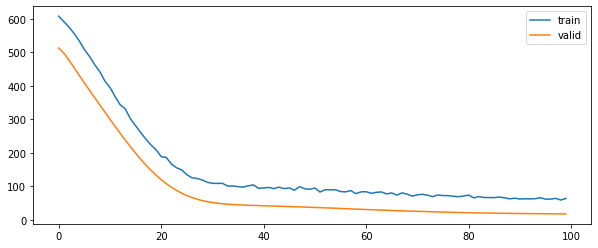

optimal epoch number: 100
params on optimal epoch:
mape on valid: 17.5527, on train: 25.9571
r2 on valid: 0.6263, on train: 0.2849
best val loss: 17.90061378479004
refit finished in 24.410097 sec
refit on full train (99%) dataset activated
refit succeed in 23.4 sec

predict generated in 0.3 sec
r2 on test dataset: 0.6618


In [13]:
#  Тестовый прогон функций

x_input = keras.layers.Input(shape=(20))
x_2 = keras.layers.Dense(20, activation='sigmoid')
x_3 = keras.layers.Dropout(0.2)
x_4 = keras.layers.Dense(5, activation='relu')
x_out = keras.layers.Dense(1, activation='linear')

sequence = [x_input, x_2, x_3, x_4, x_out]

comp_params = {
    'loss': 'mse',
    'optimizer': 'adam',
    'metrics': ['mean_absolute_percentage_error', r2]
}


model = model_compiler(sequence, comp_params,  display_model=True, func_style=False)

model = model_fit_valid(model, X_train_nn , y_train, n_epochs=100, batch_size=32, 
                      validation_split=0.1, use_early_stopping=False, verbose_mode=0, show_chart=True)

pred = model_predict(model, X_train_nn, y_train, X_test_nn, y_test, n_epochs=100, batch_size=32, 
                   refit_model_on_full_data=True, verbose_refit=0)

#### Подбор гиперпараметров

- я буду использовать early stopping callback с 15% долей

- поиск будет вестись с последовательным сужением пространства гиперпараметров
  
  - поиск оптимальной архитектуры (без учета Dropout), c использованием Relu и с небольшим числом нодов (32)
    - 1 слой
    - 2 слоя
    - 3 слоя
  - количество нодов
  - выбор оптимальной активационной функции
  - добавление dropout
  - выбор batch size
  - вариация алгоритмов оптимизации

In [14]:

from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD

input_shape = (20)

comp_params = {
    'loss': 'mse',
    'optimizer': 'adam',
    'metrics': ['mean_absolute_percentage_error', r2]
}

##### Layers num

1-hidden layer
--------------------------------------------------------------------------------
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_3 (Dense)             (None, 40)                840       
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


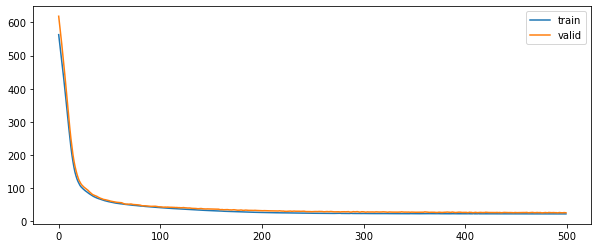

optimal epoch number: 492
params on optimal epoch:
mape on valid: 17.3499, on train: 17.3869
r2 on valid: 0.5507, on train: 0.6260
best val loss: 25.200071334838867
refit finished in 117.094803 sec
********************************************************************************
2-hidden layer
--------------------------------------------------------------------------------
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_5 (Dense)             (None, 40)                840       
                                                                 
 dense_6 (Dense)             (None, 20)                820       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
              

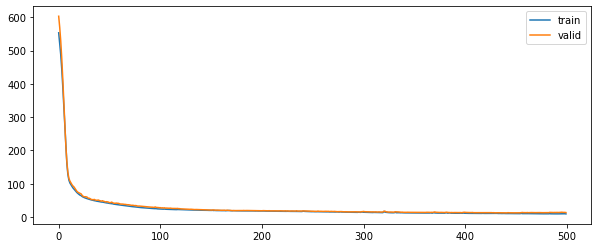

optimal epoch number: 442
params on optimal epoch:
mape on valid: 12.0405, on train: 11.9258
r2 on valid: 0.7810, on train: 0.8455
best val loss: 12.737140655517578
refit finished in 116.647419 sec
********************************************************************************
3-hidden layer
--------------------------------------------------------------------------------
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_8 (Dense)             (None, 40)                840       
                                                                 
 dense_9 (Dense)             (None, 30)                1230      
                                                                 
 dense_10 (Dense)            (None, 20)                620       
              

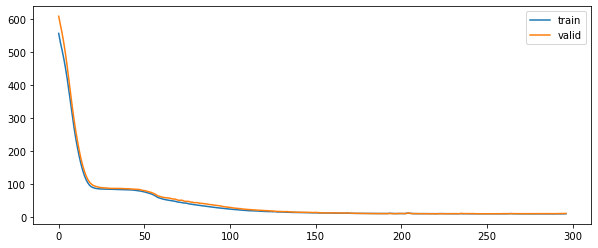

optimal epoch number: 222
params on optimal epoch:
mape on valid: 10.6927, on train: 11.3539
r2 on valid: 0.8427, on train: 0.8670
best val loss: 9.800773620605469
refit finished in 68.888105 sec
********************************************************************************
4-hidden layer
--------------------------------------------------------------------------------
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_12 (Dense)            (None, 40)                840       
                                                                 
 dense_13 (Dense)            (None, 30)                1230      
                                                                 
 dense_14 (Dense)            (None, 20)                620       
                

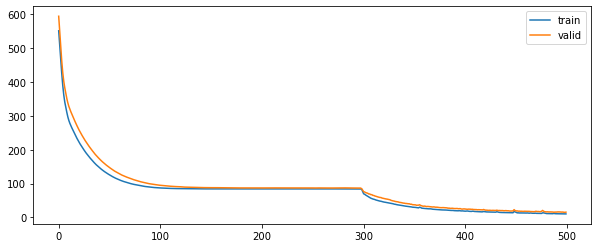

optimal epoch number: 499
params on optimal epoch:
mape on valid: 12.4623, on train: 10.7124
r2 on valid: 0.8130, on train: 0.7669
best val loss: 14.9556884765625
refit finished in 115.489874 sec
********************************************************************************


In [15]:
# 4.1.1. Подбор количества слоев

# 1-layer case
x_in = Input(input_shape)
x_1 = Dense(40, activation='linear')(x_in)
x_out = Dense(1, activation='linear')(x_1)
layers_seq1 = [x_in, x_1, x_out] 

print('1-hidden layer')
print(80*'-')
model = model_compiler(layers_list=layers_seq1, compile_params=comp_params, display_model=True,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')


# 2-layer case
x_in = Input(input_shape)
x_1 = Dense(40, activation='linear')(x_in)
x_2 = Dense(20, activation='relu')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq2 = [x_in, x_1, x_2, x_out] 

print('2-hidden layer')
print(80*'-')
model = model_compiler(layers_list=layers_seq2, compile_params=comp_params, display_model=True,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')


# 3-layer case
x_in = Input(input_shape)
x_1 = Dense(40, activation='linear')(x_in)
x_2 = Dense(30, activation='sigmoid')(x_1)
x_3 = Dense(20, activation='relu')(x_2)
x_out = Dense(1, activation='linear')(x_3)
layers_seq3 = [x_in, x_1, x_2, x_3, x_out] 

print('3-hidden layer')
print(80*'-')
model = model_compiler(layers_list=layers_seq3, compile_params=comp_params, display_model=True,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')


# 4-layer case
x_in = Input(input_shape)
x_1 = Dense(40, activation='linear')(x_in)
x_2 = Dense(30, activation='sigmoid')(x_1)
x_3 = Dense(20, activation='relu')(x_2)
x_4 = Dense(20, activation='tanh')(x_3)
x_out = Dense(1, activation='linear')(x_4)
layers_seq4 = [x_in, x_1, x_2, x_3, x_4, x_out] 

print('4-hidden layer')
print(80*'-')
model = model_compiler(layers_list=layers_seq4, compile_params=comp_params, display_model=True,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')

Наилучшие показатели у сети с двумя и тремя скрытыми слоями, возьмем наиболее простой вариант (2 слоя)

##### Количество нейронов и активационная функция

Вариант №1 - 2-hidden layer: 20-20, Relu
--------------------------------------------------------------------------------


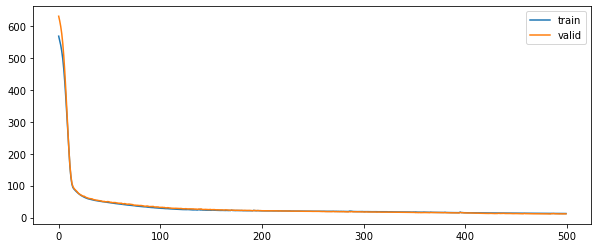

optimal epoch number: 484
params on optimal epoch:
mape on valid: 11.5945, on train: 12.5670
r2 on valid: 0.8112, on train: 0.7821
best val loss: 11.334843635559082
refit finished in 117.856951 sec
********************************************************************************
Вариант №2 - 2-hidden layer: 20-20, Sigmoid
--------------------------------------------------------------------------------
Epoch 00315: early stopping


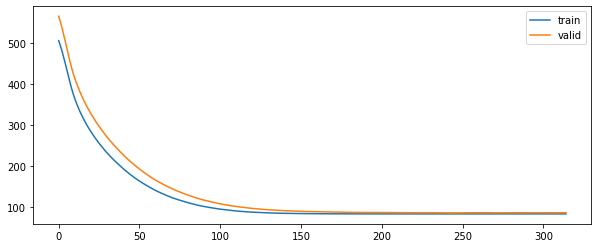

optimal epoch number: 240
params on optimal epoch:
mape on valid: 29.4063, on train: 36.4686
r2 on valid: -0.1060, on train: -0.1071
best val loss: 86.66419219970703
refit finished in 73.857615 sec
********************************************************************************
Вариант №3 - 2-hidden layer: 128-128, Relu
--------------------------------------------------------------------------------
Epoch 00245: early stopping


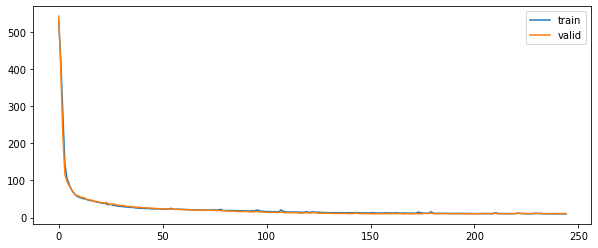

optimal epoch number: 170
params on optimal epoch:
mape on valid: 11.4487, on train: 11.7637
r2 on valid: 0.8428, on train: 0.8353
best val loss: 9.764924049377441
refit finished in 57.133295 sec
********************************************************************************
Вариант №4 - 2-hidden layer: 128-128, Sigmoid
--------------------------------------------------------------------------------
Epoch 00444: early stopping


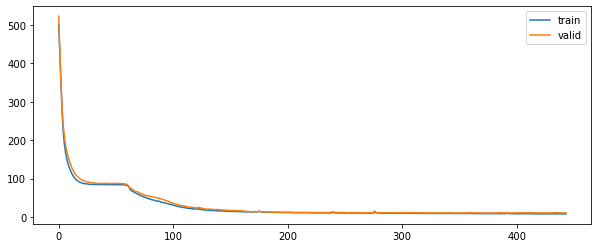

optimal epoch number: 369
params on optimal epoch:
mape on valid: 10.9231, on train: 10.9939
r2 on valid: 0.8406, on train: 0.8868
best val loss: 9.986348152160645
refit finished in 104.660444 sec
********************************************************************************
Вариант №5 - 2-hidden layer: 256-128, Sigmoid
--------------------------------------------------------------------------------
Epoch 00451: early stopping


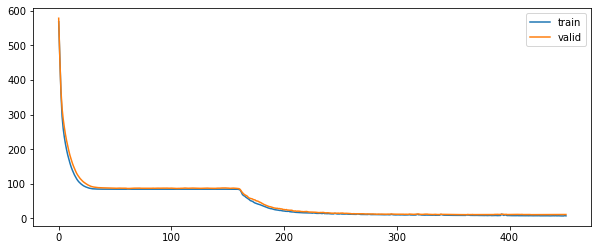

optimal epoch number: 376
params on optimal epoch:
mape on valid: 11.2335, on train: 10.8565
r2 on valid: 0.8337, on train: 0.8840
best val loss: 10.484228134155273
refit finished in 109.435600 sec
********************************************************************************
Вариант №6 - 2-hidden layer: 256-256, Sigmoid
--------------------------------------------------------------------------------
Epoch 00299: early stopping


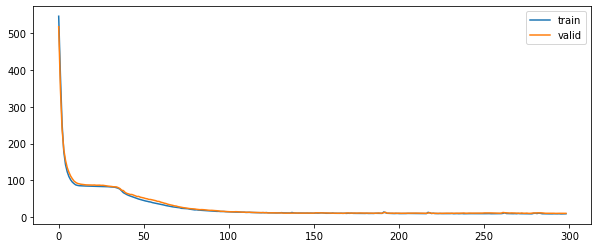

optimal epoch number: 224
params on optimal epoch:
mape on valid: 10.1755, on train: 11.7961
r2 on valid: 0.8395, on train: 0.8692
best val loss: 9.70479965209961
refit finished in 73.352092 sec
********************************************************************************


In [16]:
# Подбор количества нейронов и актив.функции

# вариант 1
x_in = Input(input_shape)
x_1 = Dense(20, activation='linear')(x_in)
x_2 = Dense(20, activation='relu')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq1 = [x_in, x_1, x_2, x_out] 

print('Вариант №1 - 2-hidden layer: 20-20, Relu')
print(80*'-')
model = model_compiler(layers_list=layers_seq1, compile_params=comp_params, display_model=False,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')


# вариант 2
x_in = Input(input_shape)
x_1 = Dense(20, activation='linear')(x_in)
x_2 = Dense(20, activation='sigmoid')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq2 = [x_in, x_1, x_2, x_out] 

print('Вариант №2 - 2-hidden layer: 20-20, Sigmoid')
print(80*'-')
model = model_compiler(layers_list=layers_seq2, compile_params=comp_params, display_model=False,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')



# вариант 3
x_in = Input(input_shape)
x_1 = Dense(128, activation='linear')(x_in)
x_2 = Dense(128, activation='relu')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq3 = [x_in, x_1, x_2, x_out] 

print('Вариант №3 - 2-hidden layer: 128-128, Relu')
print(80*'-')
model = model_compiler(layers_list=layers_seq3, compile_params=comp_params, display_model=False,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')



# вариант 4
x_in = Input(input_shape)
x_1 = Dense(128, activation='linear')(x_in)
x_2 = Dense(128, activation='sigmoid')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq4 = [x_in, x_1, x_2, x_out] 

print('Вариант №4 - 2-hidden layer: 128-128, Sigmoid')
print(80*'-')
model = model_compiler(layers_list=layers_seq4, compile_params=comp_params, display_model=False,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')


# вариант 5
x_in = Input(input_shape)
x_1 = Dense(256, activation='linear')(x_in)
x_2 = Dense(128, activation='sigmoid')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq5 = [x_in, x_1, x_2, x_out] 

print('Вариант №5 - 2-hidden layer: 256-128, Sigmoid')
print(80*'-')
model = model_compiler(layers_list=layers_seq5, compile_params=comp_params, display_model=False,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')


# вариант 6
x_in = Input(input_shape)
x_1 = Dense(256, activation='linear')(x_in)
x_2 = Dense(256, activation='sigmoid')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq6 = [x_in, x_1, x_2, x_out] 

print('Вариант №6 - 2-hidden layer: 256-256, Sigmoid')
print(80*'-')
model = model_compiler(layers_list=layers_seq6, compile_params=comp_params, display_model=False,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')

Выводы:
- оптимальное количество нейронов - 128-128
- оптимальная функция - Sigmoid
- модель обучается за ~ 380 эпох

##### Dropout (одна из полезных команд TensorFlow)

dropout rate: 0
--------------------------------------------------------------------------------
Epoch 00413: early stopping


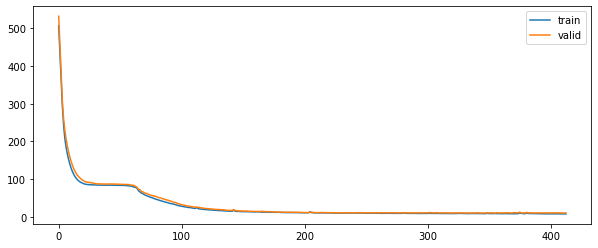

optimal epoch number: 338
params on optimal epoch:
mape on valid: 10.8681, on train: 11.2022
r2 on valid: 0.8393, on train: 0.8679
best val loss: 10.146676063537598
refit finished in 99.154254 sec
********************************************************************************
dropout rate: 0.1
--------------------------------------------------------------------------------
Epoch 00448: early stopping


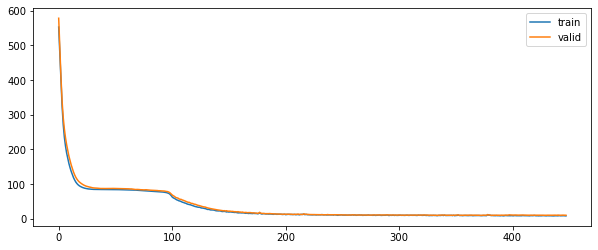

optimal epoch number: 373
params on optimal epoch:
mape on valid: 10.5785, on train: 11.5993
r2 on valid: 0.8476, on train: 0.8767
best val loss: 9.578217506408691
refit finished in 110.454340 sec
********************************************************************************
dropout rate: 0.2
--------------------------------------------------------------------------------


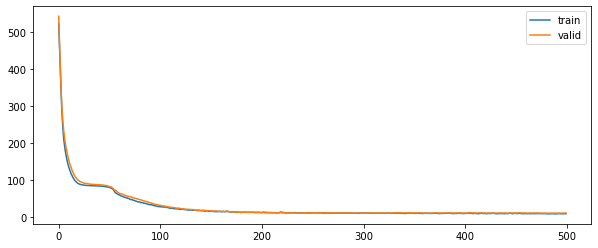

optimal epoch number: 487
params on optimal epoch:
mape on valid: 10.7270, on train: 10.8366
r2 on valid: 0.8486, on train: 0.8868
best val loss: 9.577767372131348
refit finished in 119.393347 sec
********************************************************************************
dropout rate: 0.3
--------------------------------------------------------------------------------
Epoch 00480: early stopping


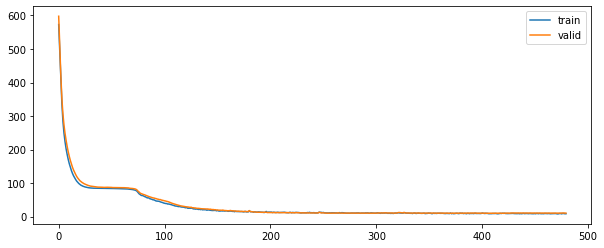

optimal epoch number: 405
params on optimal epoch:
mape on valid: 10.7910, on train: 11.6271
r2 on valid: 0.8419, on train: 0.1248
best val loss: 9.89400863647461
refit finished in 118.534513 sec
********************************************************************************


In [17]:
# 3.3.1. 1 слой dropout
dropout_rates = [0, 0.1, 0.2, 0.3]

for d in dropout_rates:
    x_in = Input(input_shape)
    x_1 = Dense(128, activation='linear')(x_in)
    x_d1 = Dropout(d)(x_1)
    x_2 = Dense(128, activation='sigmoid')(x_d1)
    x_out = Dense(1, activation='linear')(x_2)
    layers_seq = [x_in, x_1, x_d1, x_2, x_out] 

    print(f'dropout rate: {d}')
    print(80*'-')
    model = model_compiler(layers_list=layers_seq, compile_params=comp_params, display_model=False,
                                         func_style=True)

    model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                          use_early_stopping=True, verbose_mode=0, show_chart=True)

    print(80*'*')
    

Особо dropout параметры не улучшает, поэтому на следующий этап модель будет без служебных слоев

##### Batch Size

batch size: 16
--------------------------------------------------------------------------------
Epoch 00410: early stopping


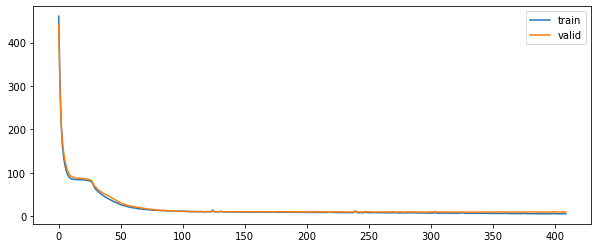

optimal epoch number: 335
params on optimal epoch:
mape on valid: 11.1321, on train: 9.8780
r2 on valid: -6331901.5000, on train: 0.8955
best val loss: 9.532059669494629
refit finished in 105.442569 sec
********************************************************************************
batch size: 32
--------------------------------------------------------------------------------
Epoch 00452: early stopping


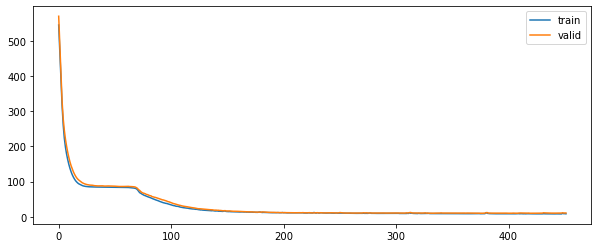

optimal epoch number: 377
params on optimal epoch:
mape on valid: 10.4391, on train: 10.9160
r2 on valid: 0.8402, on train: 0.8370
best val loss: 9.760977745056152
refit finished in 108.293772 sec
********************************************************************************
batch size: 64
--------------------------------------------------------------------------------


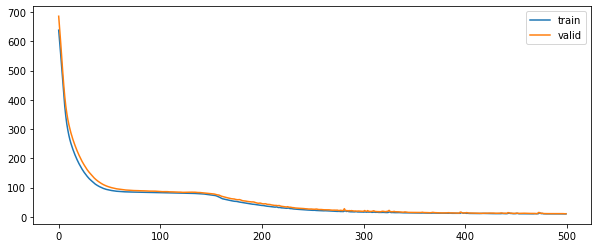

optimal epoch number: 499
params on optimal epoch:
mape on valid: 10.9795, on train: 12.1546
r2 on valid: 0.8684, on train: 0.8324
best val loss: 10.761102676391602
refit finished in 111.327696 sec
********************************************************************************
batch size: 256
--------------------------------------------------------------------------------


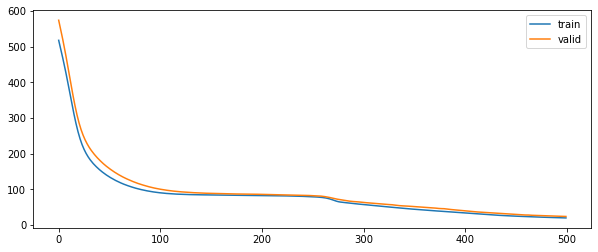

optimal epoch number: 500
params on optimal epoch:
mape on valid: 12.9381, on train: 13.3785
r2 on valid: 0.7156, on train: 0.8001
best val loss: 24.03879165649414
refit finished in 112.843909 sec
********************************************************************************


In [18]:
batch_sizes = [16, 32, 64, 256]

for bs in batch_sizes:
    x_in = Input(input_shape)
    x_1 = Dense(128, activation='linear')(x_in)
    x_2 = Dense(128, activation='sigmoid')(x_1)
    x_out = Dense(1, activation='linear')(x_2)
    layers_seq = [x_in, x_1, x_2, x_out] 

    print(f'batch size: {bs}')
    print(80*'-')
    model = model_compiler(layers_list=layers_seq, compile_params=comp_params, display_model=False,
                                         func_style=True)

    model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=bs, validation_split=0.2, 
                          use_early_stopping=True, verbose_mode=0, show_chart=True)

    print(80*'*')

##### Optimizer 

optimizer: <keras.optimizer_v2.adam.Adam object at 0x000001B0357474C0>
--------------------------------------------------------------------------------
Epoch 00926: early stopping


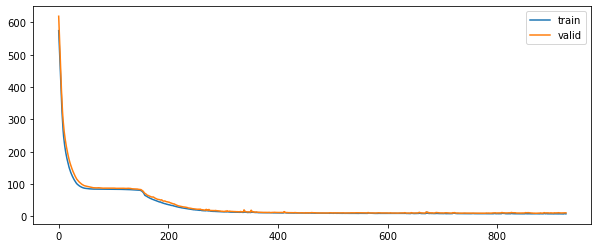

optimal epoch number: 776
params on optimal epoch:
mape on valid: 10.8029, on train: 11.7253
r2 on valid: 0.8815, on train: -0.0519
best val loss: 9.641718864440918
refit finished in 207.166745 sec
********************************************************************************
optimizer: <keras.optimizer_v2.adagrad.Adagrad object at 0x000001B035747250>
--------------------------------------------------------------------------------


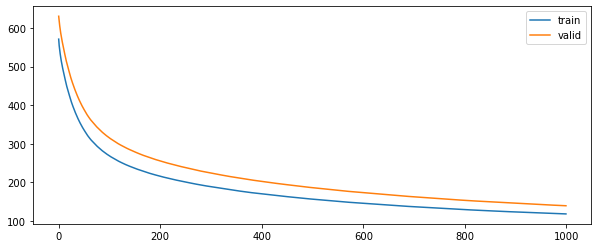

optimal epoch number: 1000
params on optimal epoch:
mape on valid: 31.2661, on train: 32.7992
r2 on valid: -0.5402, on train: -0.5726
best val loss: 139.23558044433594
refit finished in 229.765407 sec
********************************************************************************
optimizer: <keras.optimizer_v2.rmsprop.RMSprop object at 0x000001B035747970>
--------------------------------------------------------------------------------


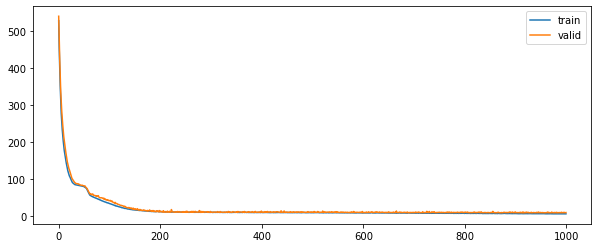

optimal epoch number: 983
params on optimal epoch:
mape on valid: 10.5678, on train: 9.3957
r2 on valid: 0.8789, on train: 0.8872
best val loss: 8.764241218566895
refit finished in 226.281035 sec
********************************************************************************
optimizer: <keras.optimizer_v2.gradient_descent.SGD object at 0x000001B0357472B0>
--------------------------------------------------------------------------------
Epoch 00372: early stopping


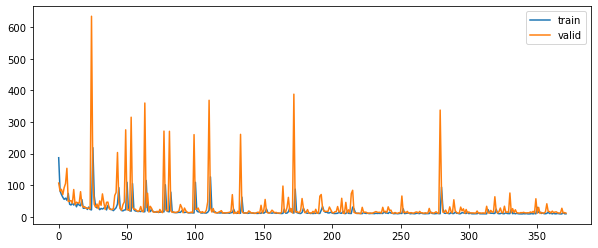

optimal epoch number: 222
params on optimal epoch:
mape on valid: 11.2645, on train: 12.1865
r2 on valid: 0.8666, on train: 0.8859
best val loss: 10.168713569641113
refit finished in 85.653872 sec
********************************************************************************


In [19]:

comp_params_1 = {
    'loss': 'mse',
    'optimizer': Adam(),
    'metrics': ['mean_absolute_percentage_error', r2]
}

comp_params_2 = {
    'loss': 'mse',
    'optimizer': Adagrad(),
    'metrics': ['mean_absolute_percentage_error', r2]
}

comp_params_3 = {
    'loss': 'mse',
    'optimizer': RMSprop(),
    'metrics': ['mean_absolute_percentage_error', r2]
}

comp_params_4 = {
    'loss': 'mse',
    'optimizer': SGD(),
    'metrics': ['mean_absolute_percentage_error', r2]
}



optimizers = [comp_params_1, comp_params_2, comp_params_3, comp_params_4]

for params in optimizers:
    x_in = Input(input_shape)
    x_1 = Dense(128, activation='linear')(x_in)
    x_2 = Dense(128, activation='sigmoid')(x_1)
    x_out = Dense(1, activation='linear')(x_2)
    layers_seq = [x_in, x_1, x_2, x_out] 

    print(f'optimizer: {params["optimizer"]}')
    print(80*'-')
    model = model_compiler(layers_list=layers_seq, compile_params=params, display_model=False,
                                         func_style=True)

    model = model_fit_valid(model, X_train_nn, y_train, n_epochs=1000, batch_size=64, validation_split=0.2, 
                          use_early_stopping=True, verbose_mode=0, show_chart=True)

    print(80*'*')

Лучший Adam

lr: 0.01, epsilon: 1e-05
--------------------------------------------------------------------------------
Epoch 00392: early stopping


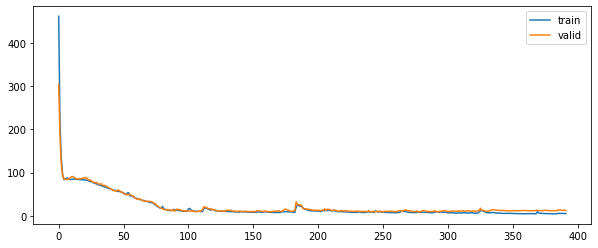

optimal epoch number: 242
params on optimal epoch:
mape on valid: 10.2907, on train: 13.0943
r2 on valid: 0.8831, on train: 0.8479
best val loss: 8.923887252807617
refit finished in 78.940009 sec
********************************************************************************
lr: 0.01, epsilon: 1e-07
--------------------------------------------------------------------------------
Epoch 00372: early stopping


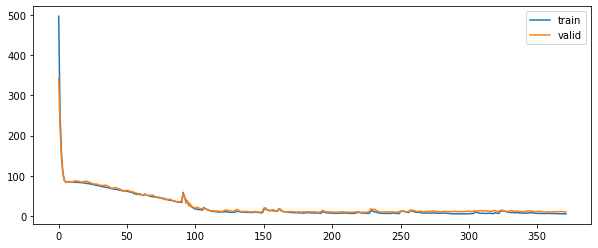

optimal epoch number: 222
params on optimal epoch:
mape on valid: 10.4610, on train: 10.0426
r2 on valid: 0.8785, on train: 0.9088
best val loss: 9.239251136779785
refit finished in 64.290056 sec
********************************************************************************
lr: 0.01, epsilon: 1e-09
--------------------------------------------------------------------------------
Epoch 00435: early stopping


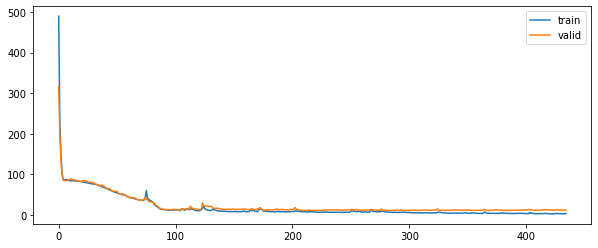

optimal epoch number: 285
params on optimal epoch:
mape on valid: 11.0186, on train: 9.4114
r2 on valid: 0.8578, on train: 0.9227
best val loss: 10.590892791748047
refit finished in 73.017007 sec
********************************************************************************
lr: 0.001, epsilon: 1e-05
--------------------------------------------------------------------------------
Epoch 00956: early stopping


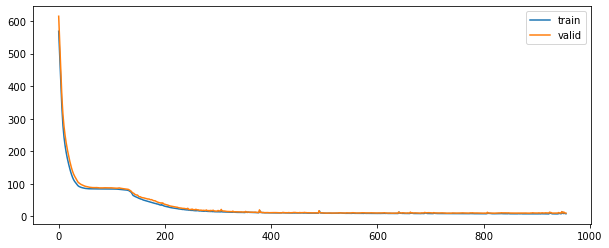

optimal epoch number: 806
params on optimal epoch:
mape on valid: 10.7780, on train: 11.2431
r2 on valid: 0.8779, on train: 0.8819
best val loss: 9.737548828125
refit finished in 153.814517 sec
********************************************************************************
lr: 0.001, epsilon: 1e-07
--------------------------------------------------------------------------------


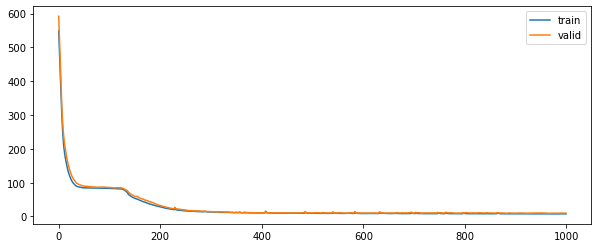

optimal epoch number: 969
params on optimal epoch:
mape on valid: 10.2407, on train: 10.6409
r2 on valid: 0.8868, on train: 0.8801
best val loss: 9.530472755432129
refit finished in 159.256386 sec
********************************************************************************
lr: 0.001, epsilon: 1e-09
--------------------------------------------------------------------------------
Epoch 00961: early stopping


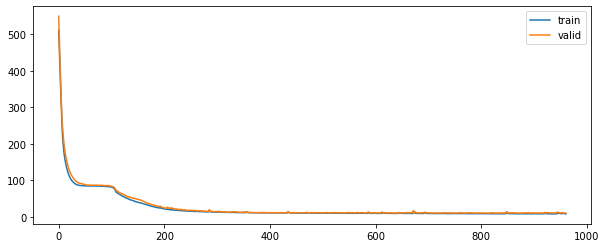

optimal epoch number: 811
params on optimal epoch:
mape on valid: 10.6762, on train: 11.2334
r2 on valid: 0.8778, on train: -0.1009
best val loss: 9.798169136047363
refit finished in 152.475630 sec
********************************************************************************
lr: 0.0001, epsilon: 1e-05
--------------------------------------------------------------------------------


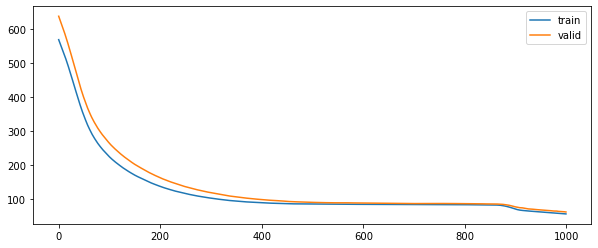

optimal epoch number: 1000
params on optimal epoch:
mape on valid: 18.4119, on train: 22.2254
r2 on valid: 0.4768, on train: 0.3952
best val loss: 61.711727142333984
refit finished in 157.776238 sec
********************************************************************************
lr: 0.0001, epsilon: 1e-07
--------------------------------------------------------------------------------


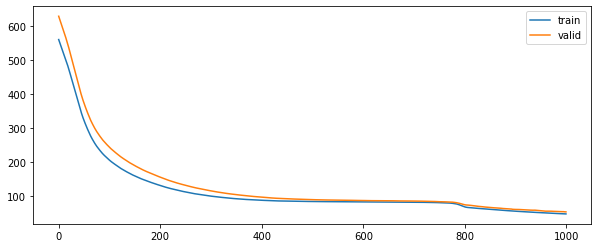

optimal epoch number: 1000
params on optimal epoch:
mape on valid: 17.8175, on train: 20.4452
r2 on valid: 0.5269, on train: 0.3858
best val loss: 54.45288848876953
refit finished in 159.142049 sec
********************************************************************************
lr: 0.0001, epsilon: 1e-09
--------------------------------------------------------------------------------
Epoch 00941: early stopping


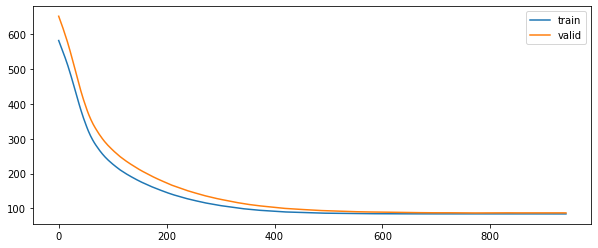

optimal epoch number: 791
params on optimal epoch:
mape on valid: 29.3863, on train: 36.4848
r2 on valid: -0.1166, on train: -0.3618
best val loss: 86.7748031616211
refit finished in 172.512052 sec
********************************************************************************


In [20]:
# Шаги
lr_list = [0.01, 0.001, 0.0001]
epsilon_list = [1e-5, 1e-7, 1e-9]

grid = list(itertools.product(lr_list, epsilon_list))

for comb in grid:
    lr = comb[0]
    eps = comb[1]
    comp_params_ = {
                    'loss': 'mse',
                    'optimizer': Adam(learning_rate=lr, epsilon=eps),
                    'metrics': ['mean_absolute_percentage_error', r2]
                    }

    x_in = Input(input_shape)
    x_1 = Dense(128, activation='linear')(x_in)
    x_2 = Dense(128, activation='sigmoid')(x_1)
    x_out = Dense(1, activation='linear')(x_2)
    layers_seq = [x_in, x_1, x_2, x_out] 

    print(f'lr: {lr}, epsilon: {eps}')
    print(80*'-')
    model = model_compiler(layers_list=layers_seq, compile_params=comp_params_, 
                                                          display_model=False, func_style=True)

    model = model_fit_valid(model, X_train_nn, y_train, n_epochs=1000, batch_size=64, 
                                               validation_split=0.2, use_early_stopping=True, verbose_mode=0, 
                                               show_chart=True)

    print(80*'*')

Выводы по подбору параметров
- оптимальная архитектура: FC(128, linear) - FC(128, sigmoid) - FC(1, linear)
- размер батча: 64
- существенный прирост по метрике аккуратности достигнут был (с 50 до 85%)
- оптимальный оптимизатор - ADAM(lr=0.01, epsilon=1e-5)

#### Обучение финальной модели и валидация на тестовой выборке

In [21]:
comp_params_opt = {
                    'loss': 'mse',
                    'optimizer': Adam(learning_rate=0.01, epsilon=1e-5),
                    'metrics': ['mean_absolute_percentage_error', r2]
                    }

x_in = Input(input_shape)
x_1 = Dense(128, activation='linear')(x_in)
x_2 = Dense(128, activation='sigmoid')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_opt = [x_in, x_1, x_2, x_out] 



model = model_compiler(layers_list=layers_opt, compile_params=comp_params_opt, display_model=False,
                                     func_style=True)

predict = model_predict(model, X_train_nn, y_train, X_test_nn, y_test, n_epochs=450, batch_size=64, 
                      refit_model_on_full_data=True, verbose_refit=0)

refit on full train (99%) dataset activated
refit succeed in 100.0 sec

predict generated in 0.2 sec
r2 on test dataset: 0.7737
